# Projeto 2 - Ciência dos dados

#### Nomes: Pedro Henrique Britto Aragão Andrade, Letícia Teles Machado, Thiago Shiguero Kawahara

In [84]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [85]:
# Abrindo o dataset

dadoscru= pd.read_csv("chocolate.csv")
dadoscru

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,2219,1205,Zotter,Austria,2014,Blend,Raw,80.0,2.75,4,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
2220,2220,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
2221,2221,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
2222,2222,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


In [86]:
# Filtrando as colunas

dados_= dadoscru.iloc[:, [3, 5, 7, 8, 9, 11, 12, 13, 17]]

In [87]:
# Renomenando as colunas

dados= dados_.rename(columns= {"company": "cia", "company_location": "local_cia", "country_of_bean_origin": "país_grão",
                      "cocoa_percent": "%cacau", "counts_of_ingredients": "num_ingr", "cocoa_butter": "manteiga_cacau",
                      "vanilla": "baunilha", "lecithin": "lecitina", "first_taste": "1_sabor", "second_taste": "2_sabor"})

In [88]:
# Renomeando as linhas

dados.loc[dados.manteiga_cacau== "have_cocoa_butter", "manteiga_cacau"]= "s"
dados.loc[dados.manteiga_cacau== "have_not_cocoa_butter", "manteiga_cacau"]= "n"

dados.loc[dados.baunilha== "have_not_vanila", "baunilha"]= "n"
dados.loc[dados.baunilha== "have_vanila", "baunilha"]= "s"

dados.loc[dados.lecitina== "have_not_lecithin", "lecitina"]= "n"
dados.loc[dados.lecitina== "have_lecithin", "lecitina"]= "s"

In [89]:
# Ordenando as colunas com yes/no

dados.manteiga_cacau = pd.Categorical(dados.manteiga_cacau, categories=['s', 'n'], ordered=True)
dados.baunilha = pd.Categorical(dados.baunilha, categories=['s', 'n'], ordered=True)
dados.lecitina = pd.Categorical(dados.lecitina, categories=['s', 'n'], ordered=True)

In [90]:
# Colocando os ratings em intervalos

for i in list(dados.rating):
    if i>=1 and i<1.5:
        dados.loc[dados.rating==i, "inter_rating"]= "1 - 1.5"
    elif i>=1.5 and i<2:
        dados.loc[dados.rating==i, "inter_rating"]= "1.5 - 2"
    elif i>=2 and i<2.5:
        dados.loc[dados.rating==i, "inter_rating"]= "2 - 2.5"
    elif i>=2.5 and i<3:
        dados.loc[dados.rating==i, "inter_rating"]= "2.5 - 3"
    elif i>=3 and i<3.5:
        dados.loc[dados.rating==i, "inter_rating"]= "3 - 3.5"
    elif i>=3.5 and i<=4:
        dados.loc[dados.rating==i, "inter_rating"]= "3.5 - 4"
    

In [123]:
# Renomeando as linhas

dados.loc[dados.manteiga_cacau== "s", "manteiga_cacau_"]= 1
dados.loc[dados.manteiga_cacau== "n", "manteiga_cacau_"]= 0

dados.loc[dados.baunilha== "n", "baunilha_"]= 0
dados.loc[dados.baunilha== "s", "baunilha_"]= 1

dados.loc[dados.lecitina== "n", "lecitina_"]= 0
dados.loc[dados.lecitina== "s", "lecitina_"]= 1

In [124]:
dados.loc[dados.rating >= 3.5 , "target"]= 1
dados.loc[dados.rating < 3.5 , "target"]= 0

In [125]:
dados.loc[dados.local_cia!= "U.S.A", "U.S.A"]= 0
dados.loc[dados.local_cia== "U.S.A", "U.S.A"]= 1

In [126]:
dados.loc[dados["%cacau"]!= 70, "70%"]= 0
dados.loc[dados["%cacau"]== 70, "70%"]= 1

In [127]:
# dicionario para categorizar os primeiros sabores

dicio = {
    
 'doce': ['fruity','sweet','mild fruit','brief fruit note','yellow fruit','hot cocoa','strawberry','red wine','creamy',
          'fruity with coffee notes','vanilla','very sweet','floral','dark berry','cashew','subtle','dried fruit','smooth',
          'melon','marshmallow','strawberries','grapes','bland','raspberry','strong vanilla','caramel','intense floral','gummy',
          'cinamon and nutmeg','mocha','intense marshmallow','chocolate covered cherries','red berry','sweet grass','mellow',
          'bright fruit','ripe grapes','dairy','perfume','overly sweet','sugar dominates','mild','berry','true to sugar',
          'banana','deep cherry','licorice','cherry','brownie','sweet spice','raisins','mild cherry','cinamon','intense fruit',
          'mild fruit and spice','tropical berry','blackberry','dark forest berry','caramel and cocoa','candy like off flavor',
          'blackberry and cinnamon','ultra fruity','brownine','fruit','prominent plum note','malitol','plums','coconut','fig',
          'honey','choco covered strawberry','tea','chocolate covered banana','blackberries','strong fruit','red fruit',
          'mild strawberry','sweet edge','sl. sweet','light perfume','overyly sweet','strong floral','too sweet','mild caramel',
          'candy','candy like','candy-like','mild vanilla and mild fruit','strong raspberry','spoiled milk',
          'intense mocha flavor','raisiny','intense vanilla','grape','grapefruit','tropical fruit and mild smoke',
          'candy spices','wine','cocounut','Fruity','notes from sugar','intense grapes','peanut butter','maple','rubbery',
          'simple red berry','berry notes with sweet edge','bright red fruit','fudgey','intense plum','refined','Easter candy',
          'rich brownie','intense fruity','bold cherry','light brown','ligt color','apple','subtle red berry','cranberries',
          'pronounced berry','robust dark tropical fruit','dried fig','berries','pronounced fruit','roasted strawberry',
          'intense sweet','yogurt','mellow fruit','intense prune and berry'],
 
 'amargo': ['cocoa','rich cocoa','mild tobacco','burnt rubber','burnt wood','cocoa and powerful tang','gritty','woody','rich',
            'high roast','smokey','coffee','light roast','bitter','appealing smoke','smoke','burn butterscotch','sl. bitter',
            'leather','base cocoa','tobacco','dark cocoa','bitter then nutty rustic','mild bitter','heavy roast','mild smoke',
            'base cocoa w/ palm notes','over roasted','assertive','high astringent','mild cocoa','deep cocoa','burnt coffee',
            'burnt up front','med roast','dark roast','bold','basic cocoa','woodsy','coffee and cocoa','cocoa flavor dominates',
            'wood','dark woody','dark coffee','burnt honey','late cocoa','intense cocoa','low refinement',
            'dominated by heavy roast','slightly burnt','mild smoke and fruit','cocoa and fresh grapes','mildly burnt caramel',
            'strong cocoa','black current','cocoa and coconut','mild woody','mildly rich','XL nibs','rich chocolate',
            'harsh flavor','ashey','full bodied','slight burnt','harsh burnt','strong','watered down coffee','roasty/smokey',
            'bitter coffee flavor','rough','overly intense','strong base cocoa','intensely smokey','burnt caramel',
            'mild smokey','intense smoke','smoke dominates','large nibs','deep','cocoa base','fresh nibs',
            'strong smokey tobacco','full cocoa flavor','cigar','mild cacao and fruit notes','black tea','basic chocolate',
            'burnt black licorice','dark color','pure','roasty cocoa','slight bitter','nutty and bitter dominate',
            'cocoa dominates','rich base cocoa','heavy smoke','toffee','hint of smoke'],
 
 'salgado': ['vegetal','green','nutty','roasty','herbal','hay','cardboard','nut','slight roasty','nuts','herbs','ham-like',
             'nutmeg','roasted nuts','bready','strong nutty with off notes','raw','banana nut','cucumber','carrots','hazelnut',
             'grits','large grits','few grits','olive','intense olive','baked bread','cheesy off flavor','mild nutty','palm',
             'cardamon','peanut','medium roast','anise','mild hammy','musty','vegetable and honey','grass','mildy nutty',
             'burnt nuts','tannic','smoked ham','ham','walnuts','baked','mild nutty and fruit','strong malt','salt noticeable',
             'strong nutty'],
 
 'acido': ['orange','spicy and candy-like','strong pepper','citrus','spicy','spice','hot spice','strong spice','tart',
           'sour fruit','spicey','black pepper and banana','blackpepper','black pepper','high acidity','sour',
           'subtle but refreshing','distinct lemon','sour milk','acidic','mild metallic and spice','slightly metallic',
           'intense orange','lemon','ripe orange','green apple','mild mint','metallic','mild spice','smoth','sour off flavor',
           'sour grapes','very sour','very spicy','pungent','pungent raisin','high acid','sour raisin','mild metallic',
           'oranges','aluminum','spicy and fragrant','chemical','rum','tangy','sour fig','intense spice','savory','vinegar',
           'intense spicy','mild tart','metal','mint','sour palm','dominant spice','strong spicey','fudgey then spicy',
           'evolves black pepper to citrus','sticy','savory lemon','sour orange','spciy'],
 
 'arenoso': ['sandy','sliglty dry','harsh','grainy texture','unrefined','grit','dry','powdery','grainy','chalky','earthy',
             'muddy','grassy','slightly dry','roasty and under refined','dirt','off pungent','crumbly','sl. chalky','dirty',
             'intense earthy','sl. dry','sandpaper','slight dry','mostly earthy','very sandy','potting soil','mild earthy',
             'soil','slight grainy'],
 
 'gorduroso': ['oily','sticky','fatty','waxy','waxy mouthfeel','chewy','molasses','pastey','pungent off flavor','silky',
               'cloying','klingy','oily surface','butter','nice melt','molasses notes from sugar','buttery','mild fatty',
               'mild molasses','rubber','butterscotch','molassses','clingy','molasses undertone'],
 
 'complexo': ['delicate','astringent','mild profile','alluring aroma','intense','basic','balanced','long lasting','off aroma',
              'long','coarse','complex','unbalanced','chunky','smooth texture','rustic','robust','off','flat','simple',
              'light color','distinct','off notes','soapy','slow','short','harsh aroma','hammy','muted','texture issues',
              'one dimensional','well defined','near perfect shine','dates','intens','very coarse','slow develop',
              'unique flavor','accessible','poor texture','dutched?','full flavor spectrum','fungal','off note','poor finish',
              'well balanced','multiple off flavors','uneven','accesible','non descript','single note','swiss miss','dense',
              'subdued','dominant savory','strong rubber','thick','uneven melt','sharp','slow to develop','super temper','dull',
              'modest']
}

In [128]:
dicio2= {
    
    0: ['Madagascar','Dominican republic','Tanzania','Papua new guinea','Burma','Togo','Sao tome','Fiji','Vanuatu','Indonesia',
        'Trinidad','Vietnam','Ghana','Blend','Grenada','Jamaica','India','Congo','Philippines','Solomon islands','Uganda',
        'Malaysia','Sri lanka','Ivory coast','Gabon','Taiwan','St. lucia','Australia','Liberia','Sierra leone','Nigeria',
        'U.s.a.','St.vincent-grenadines','Thailand','Tobago','Sumatra','Cameroon','Samoa','Sao tome & principe','Principe',
        'Sulawesi','Dr congo'],
    
 1: ['Peru',
  'Bolivia','Venezuela','Ecuador','Brazil','Panama','Colombia','Cuba','Mexico','Nicaragua','Belize','Guatemala','Costa rica',
     'Honduras','Haiti','Puerto rico','Martinique','Bolvia','El salvador','Suriname']}

In [129]:
# Substituindo os sabores pelas suas categorias

for i in list(dados["1_sabor"]):
    if i in dicio["doce"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "doce"
    elif i in dicio["amargo"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "amargo"
    elif i in dicio["salgado"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "salgado"
    elif i in dicio["acido"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "acido"
    elif i in dicio["arenoso"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "arenoso"
    elif i in dicio["gorduroso"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "gorduroso"
    elif i in dicio["complexo"]:
        dados.loc[dados["1_sabor"]==i,"1_sabor"]= "complexo"

In [130]:
# Substituindo os sabores pelas suas categorias

for i in list(dados["país_grão"]):
    if i in dicio2[1]:
        dados.loc[dados["país_grão"]==i,"latina"]= 1
    elif i in dicio2[0]:
        dados.loc[dados["país_grão"]==i,"latina"]= 0

In [131]:
dados

,local_cia,país_grão,%cacau,rating,num_ingr,manteiga_cacau,baunilha,lecitina,1_sabor,inter_rating,manteiga_cacau_,baunilha_,lecitina_,target,U.S.A,70%,latina
0,U.S.A,Madagascar,76.0,3.75,3,s,n,n,amargo,3.5 - 4,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,U.S.A,Dominican republic,76.0,3.50,3,s,n,n,amargo,3.5 - 4,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,U.S.A,Tanzania,76.0,3.25,3,s,n,n,amargo,3 - 3.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,France,Peru,63.0,3.75,4,s,n,s,doce,3.5 - 4,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,France,Bolivia,70.0,3.50,4,s,n,s,salgado,3.5 - 4,1.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Austria,Blend,80.0,2.75,4,s,n,n,gorduroso,2.5 - 3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2220,Austria,Colombia,75.0,3.75,3,s,n,n,salgado,3.5 - 4,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2221,Austria,Belize,72.0,3.50,3,s,n,n,complexo,3.5 - 4,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2222,Austria,Congo,70.0,3.25,3,s,n,n,gorduroso,3 - 3.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [132]:
# lista= []
# dicio2= {0: [], 1: []}

# for i in list(dados.país_grão):
#     if i not in lista:
#         lista.append(i)

# contagem= len(lista)
# for a in lista:
#     print (a, contagem)
#     x= int(input(""))
    
#     while x not in dicio2:
#         x= int(input(""))
        

#     dicio2[x].append(a)
#     contagem-= 1

1º Coluna (local_cia)- Localização da companhia $\Rightarrow$ qualitativa

2º Coluna (país_grão)- País de origem do grão $\Rightarrow$ qualitativa

3º Coluna (%cacau)- Porcentagem de cacau $\Rightarrow$ quantitativa

4º Coluna (rating)- Avaliação de 0 a 4 $\Rightarrow$ qualitativa ordinal

5º Coluna (num_ingr)- Número de ingredientes $\Rightarrow$ quantitativo

6º Coluna (manteiga_cacau)- Se possui manteiga de cacau (yes/no) $\Rightarrow$ qualitativa

7º Coluna (baunilha)- Se possui baunilha (yes/no) $\Rightarrow$ qualitativa

8º Coluna (lecitina)- Se possui leticina (yes/no) $\Rightarrow$ qualitativa

9º Coluna (1_sabor)- Primeiro sabor $\Rightarrow$ qualitativa

10º Coluna (inter_rating)- Intervalo do rating $\Rightarrow$ qualitativa

In [133]:
# Para analise exploratoria das colunas manteiga_cacau, baunilha e lecitina em relaçao ao rating

# Coleta de dados
def yes_no(a):
    lista= [[1, 1.5], [1.5, 2], [2, 2.5], [2.5, 3], [3, 3.5], [3.5, 4.1]]
    yes= []
    no= []
    
    for i in range (len(lista)):
        contagem= dados.loc[(dados.rating >= lista[i][0]) & (dados.rating < lista[i][1]), a].value_counts(sort=False)
        
        yes.append(round((contagem[0] / (contagem[0] + contagem[1]))*100, 2))
        no.append(round((contagem[1] / (contagem[0] + contagem[1]))*100, 2))

    # Grafico de barras
    largura = 0.25

    c = np.arange(len(yes))
    b = [j+largura for j in c]

    plt.figure(figsize=(10,5))

    plt.bar(c, yes, color="lightgreen", width=largura, label="Yes")
    plt.bar(b, no, color="lightpink", width=largura, label="No")

    plt.xticks([i+0.11 for i in range(len(yes))],["1 - 1.5","1.5 - 2","2 - 2.5","2.5 - 3","3 - 3.5","3.5 - 4"])
    plt.xlabel("Intervalos do rating")
    plt.ylabel("Porcentagem")
    plt.title(a)

    plt.legend()
    plt.show()

In [134]:
# Para analise exploratoria das colunas cia, local_cia e país_grão em relaçao ao rating

def media(a):
    
    # Criando um dicionário com o nome de cada empresa e sua respectiva média de Rating 
    dicionario= {}
    for i in dados.loc[:, a]:
        if i not in dicionario:
            dicionario[i]= round(np.mean(dados.loc[dados[a]== i, "rating"]), 2)
    c= []
    d= []

    # Tabela que relaciona a companhia com o intervalo que a sua média de rating se encaixa
    for i in dicionario.items():
        c.append(i[0])
        if i[1] >= 1 and i[1] < 1.5:
            d.append("1 - 1.5")  

        elif i[1] >= 1.5 and i[1] < 2:
            d.append("1.5 - 2")

        elif i[1] >= 2 and i[1] < 2.5:
            d.append("2 - 2.5")

        elif i[1] >= 2.5 and i[1] < 3:
            d.append("2.5 - 3")

        elif i[1] >= 3 and i[1] < 3.5:
            d.append("3 - 3.5")

        elif i[1] >= 3.5 and i[1] <= 4:
            d.append("3.5 - 4")

    data = {a:  c, 'intervalo': d,
            }

    novo = pd.DataFrame(data, columns = [a,'intervalo'])

    novo["intervalo"] = novo["intervalo"].astype("category")
    novo['intervalo'].cat.categories
    novo["intervalo"] = pd.Categorical(novo.intervalo,['1 - 1.5', '2 - 2.5', '2.5 - 3'
                                                       , '3 - 3.5', '3.5 - 4'], ordered=True)
    return pd.crosstab(novo[a], novo.intervalo, margins= True)

In [135]:
# Grafico de barras para ler os dados da funcao media()

def grafico(l1, l2, d):

    plt.figure(figsize=(8,4))

    plt.bar(l1, l2)
    plt.xlabel("Interlavo de rating")
    plt.ylabel(f"Quantidade de {d}")
    plt.title(f"Quantidade de {d} nos intervalos de rating")

    plt.tight_layout()
    plt.show()

In [136]:
# local_cia x rating

media("local_cia")

intervalo,2.5 - 3,3 - 3.5,3.5 - 4,All
local_cia,,,,
Argentina,0,0,1,1
Australia,0,1,0,1
Austria,0,1,0,1
Belgium,0,1,0,1
Bolivia,0,1,0,1
...,...,...,...,...
Vanuatu,1,0,0,1
Venezuela,0,1,0,1
Vietnam,0,1,0,1


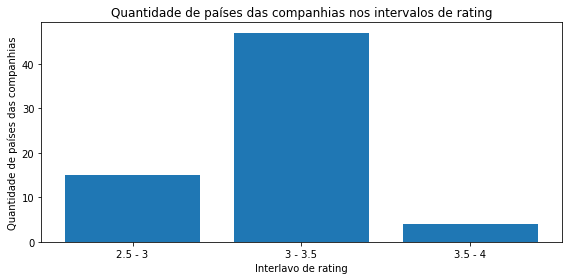

In [137]:
l1= ["2.5 - 3", "3 - 3.5", "3.5 - 4"]
l2= [15, 47, 4]

grafico(l1, l2, "países das companhias")

In [138]:
# país_grão x rating

media("país_grão")

intervalo,2.5 - 3,3 - 3.5,3.5 - 4,All
país_grão,,,,
Australia,0,1,0,1
Belize,0,1,0,1
Blend,0,1,0,1
Bolivia,0,1,0,1
Bolvia,0,1,0,1
...,...,...,...,...
Uganda,1,0,0,1
Vanuatu,0,1,0,1
Venezuela,0,1,0,1


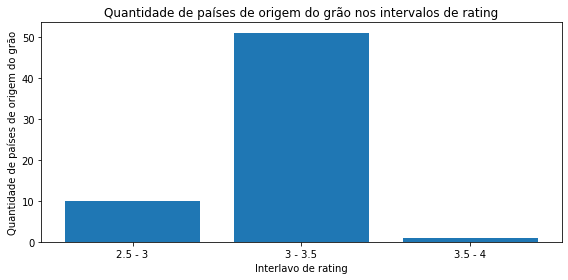

In [139]:
l1= ["2.5 - 3", "3 - 3.5", "3.5 - 4"]
l2= [10, 51, 1]

grafico(l1, l2, "países de origem do grão")

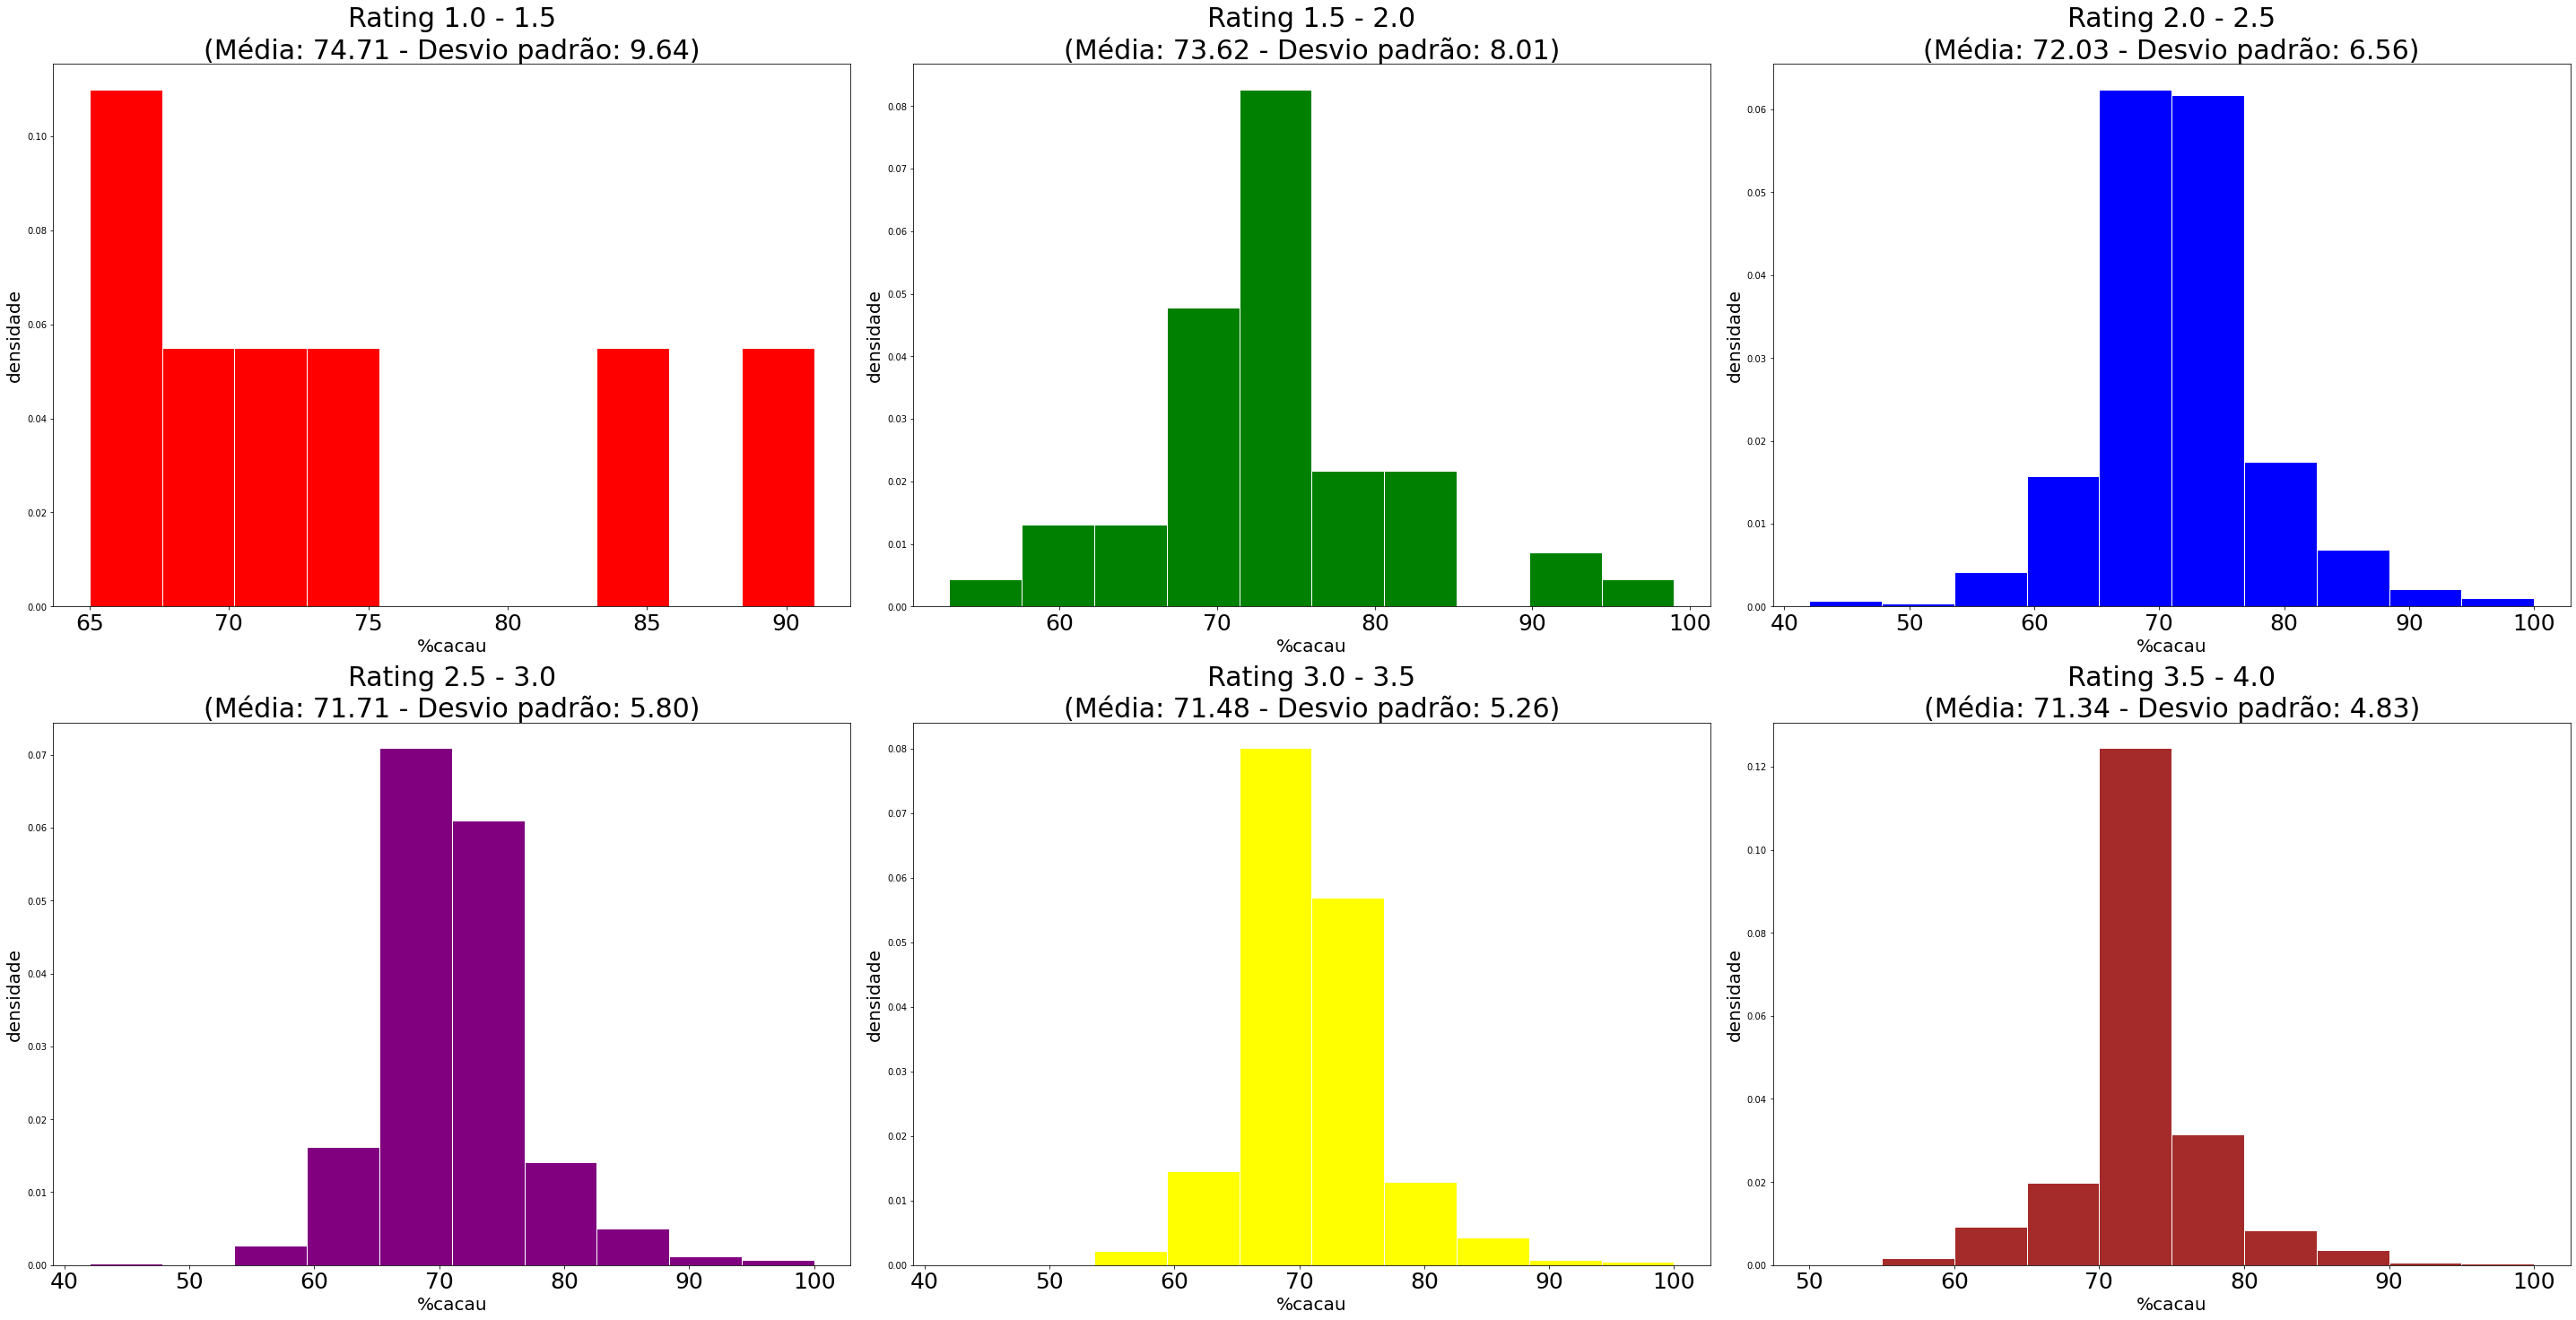

In [140]:
# %cacau x inter_rating

plt.figure(figsize=(40,30))
cor = ["red","green","blue","purple","yellow","brown"]
i = 0.5
j=1
while i+0.5<4:
    a = dados.loc[(dados.rating>=i) & (dados.rating<i+1.5),["%cacau"]]
    i+=0.5
    b = a.mean()
    c = a.std()
    plt.subplot(3,3,j)
    plt.hist(a,bins=10, density=True, color=cor[j-1], edgecolor="w")
    plt.title(f"Rating {i} - {i+0.5}\n(Média: {b[0]:.2f} - Desvio padrão: {c[0]:.2f})", fontsize=30)
    plt.ylabel("densidade", fontsize=20)
    plt.xlabel("%cacau", fontsize=20)
    plt.xticks(fontsize=25)
    j+=1
    
plt.tight_layout()

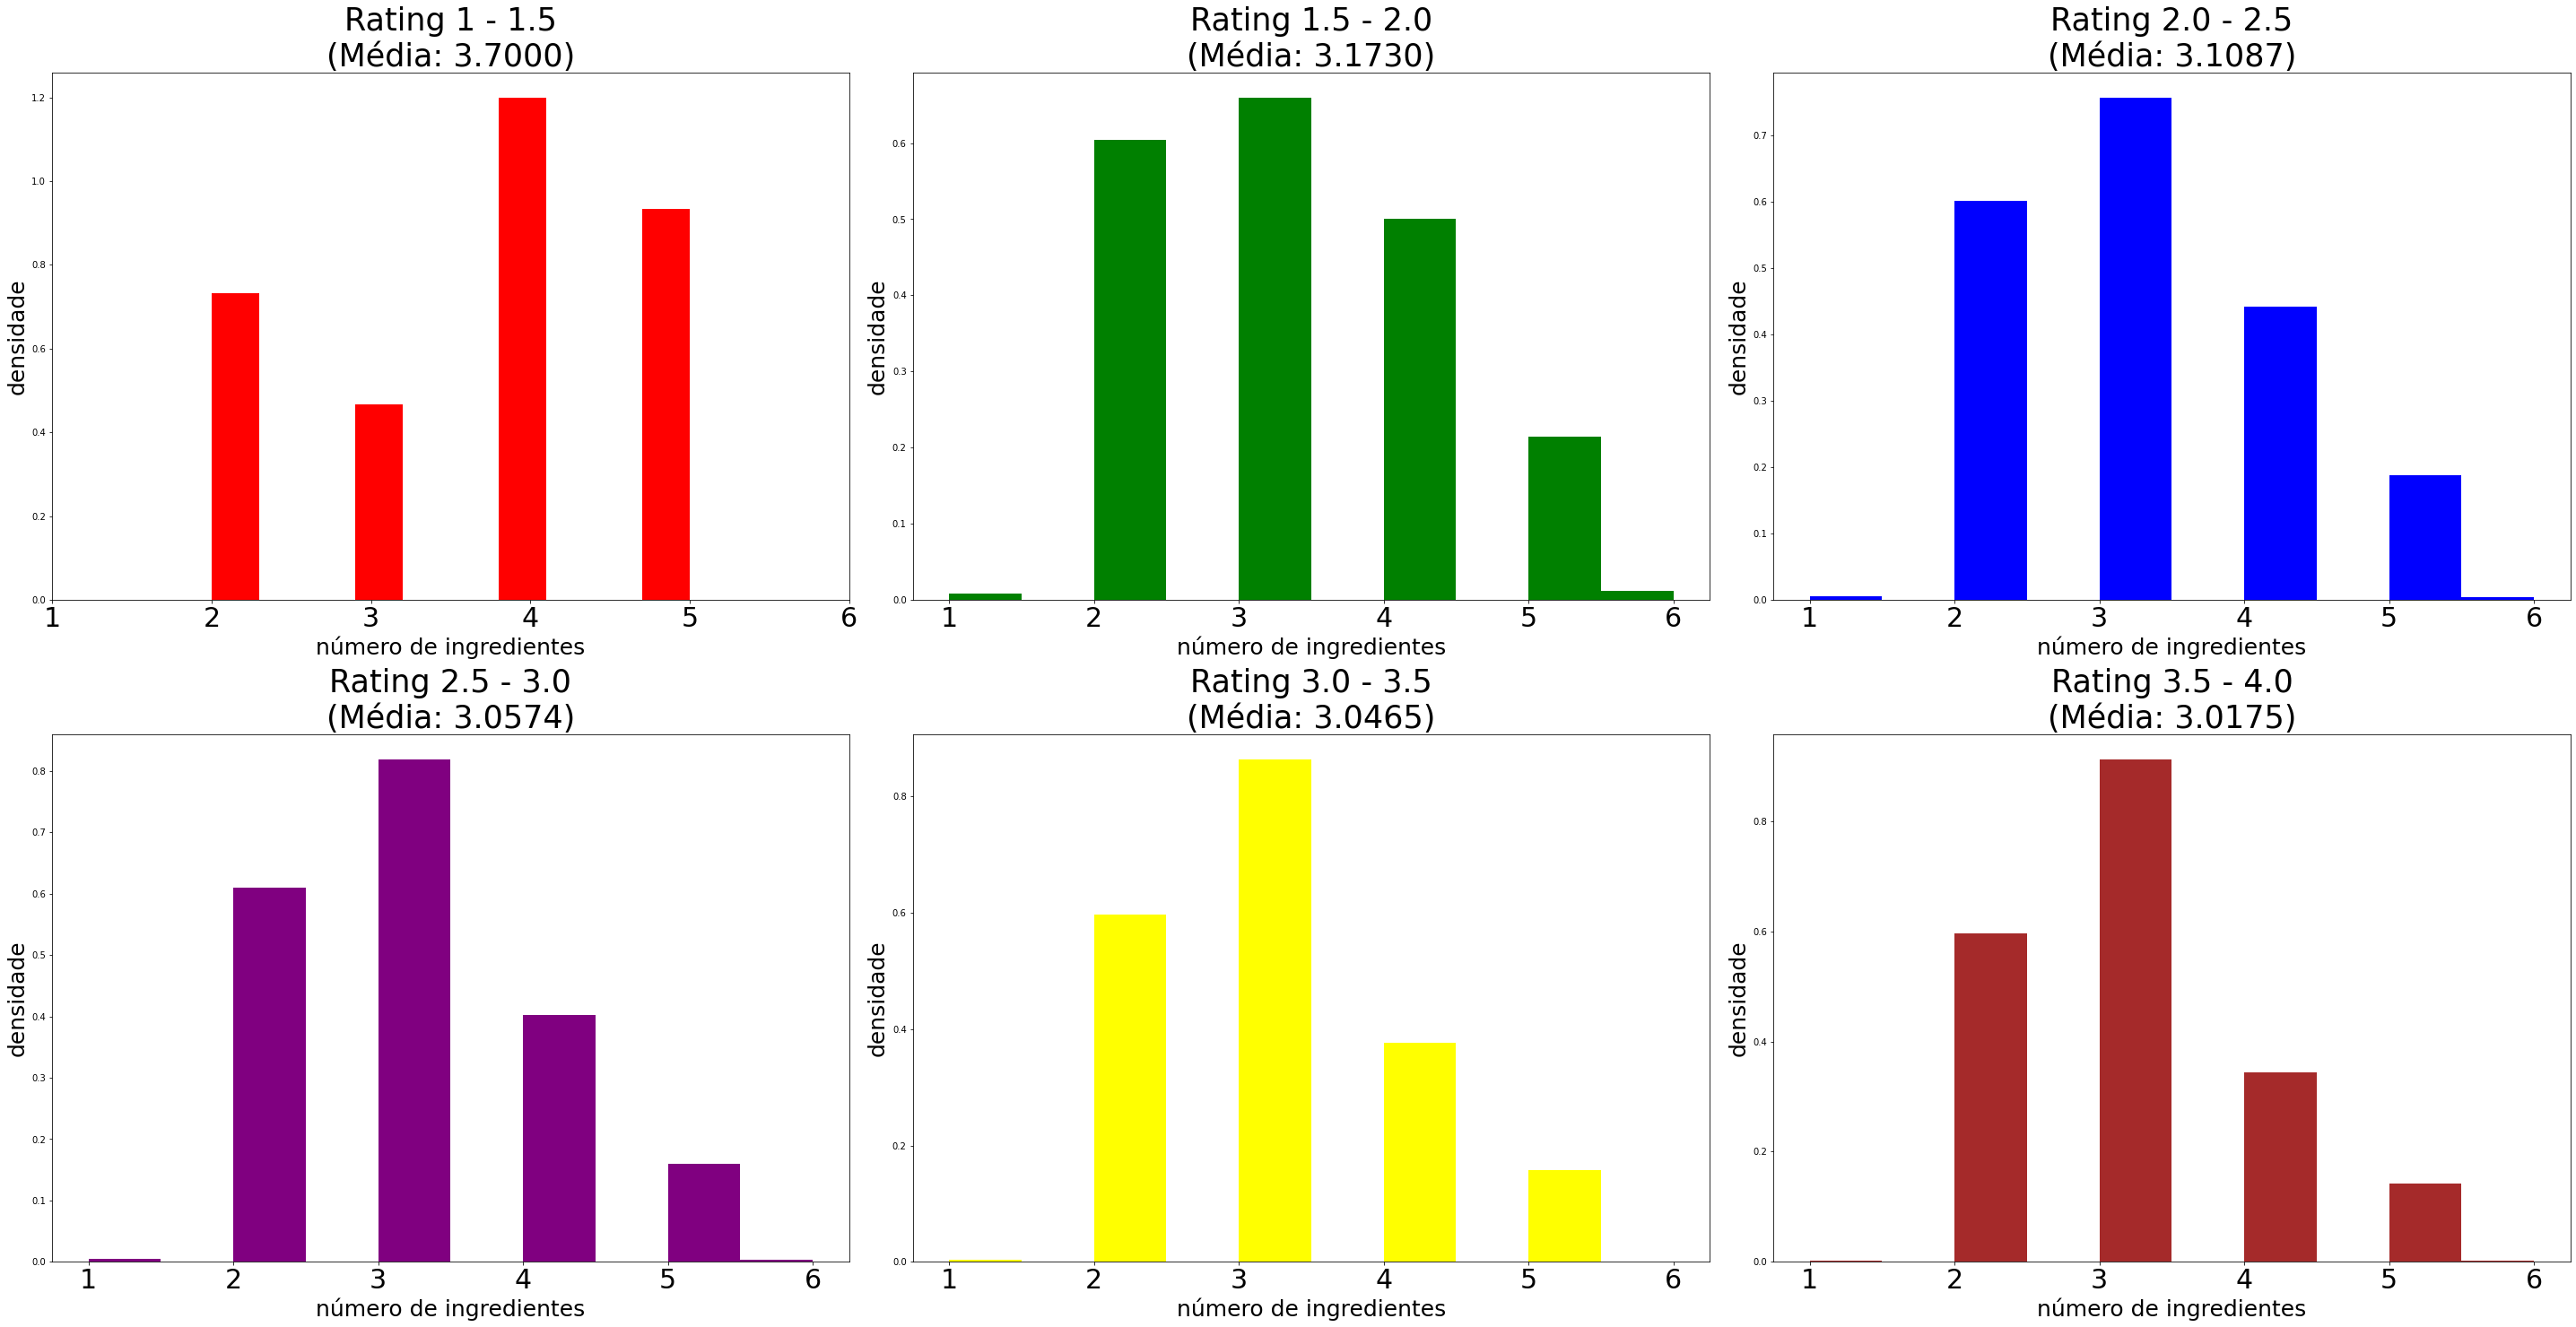

In [141]:
# num_ingr x inter_rating

plt.figure(figsize=(40,30))
cor = ["red","green","blue","purple","yellow","brown"]
j=1
i=1
while i <4:
    plt.subplot(3,3,j)
    media = dados.loc[(dados.rating>=i) & (dados.rating<i+1.5),"num_ingr"]
    plt.hist(dados.loc[(dados.rating>=i) & (dados.rating<i+1.5),"num_ingr"],bins=10,density=True,color=cor[j-1])
    plt.title(f"Rating {i} - {i+0.5}\n(Média: {media.mean():.4f})", fontsize=35)
    plt.xticks([1, 2, 3, 4, 5, 6],fontsize=30)
    plt.xlabel("número de ingredientes",fontsize=25)
    plt.ylabel("densidade",fontsize=25)
    j+=1
    i+=0.5
plt.tight_layout()
plt.show()

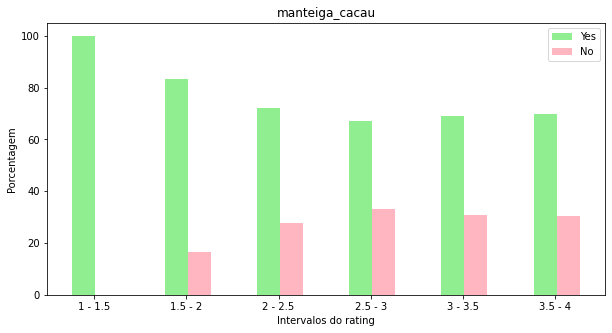

In [142]:
# manteiga_cacau x inter_rating

yes_no("manteiga_cacau")

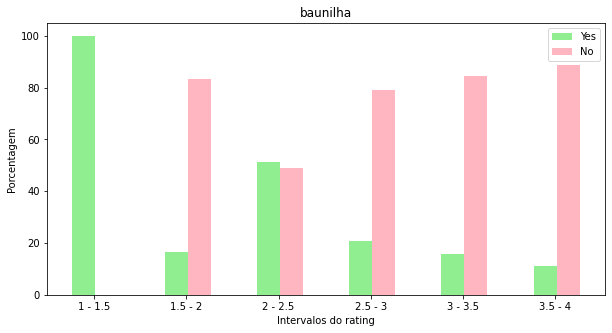

In [143]:
# baunilha x inter_rating

yes_no("baunilha")

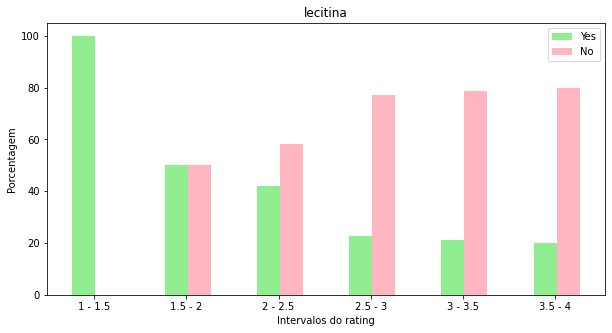

In [144]:
# lecitina x inter_rating

yes_no("lecitina")

In [145]:
# 1_sabor x inter_rating

pd.crosstab(dados.inter_rating, dados["1_sabor"], margins=True, normalize="index").round(4)*100

1_sabor,acido,amargo,arenoso,complexo,doce,gorduroso,salgado
inter_rating,,,,,,,
1 - 1.5,0.00,0.00,0.00,0.00,0.00,100.00,0.00
1.5 - 2,33.33,16.67,0.00,0.00,33.33,16.67,0.00
2 - 2.5,2.33,13.95,18.60,18.60,27.91,16.28,2.33
2.5 - 3,7.93,14.76,20.48,11.23,21.37,15.20,9.03
3 - 3.5,7.98,14.80,17.46,11.33,24.28,13.41,10.75
3.5 - 4,9.59,14.27,7.37,13.68,37.78,8.07,9.24
All,8.54,14.57,14.16,12.32,28.96,11.83,9.62


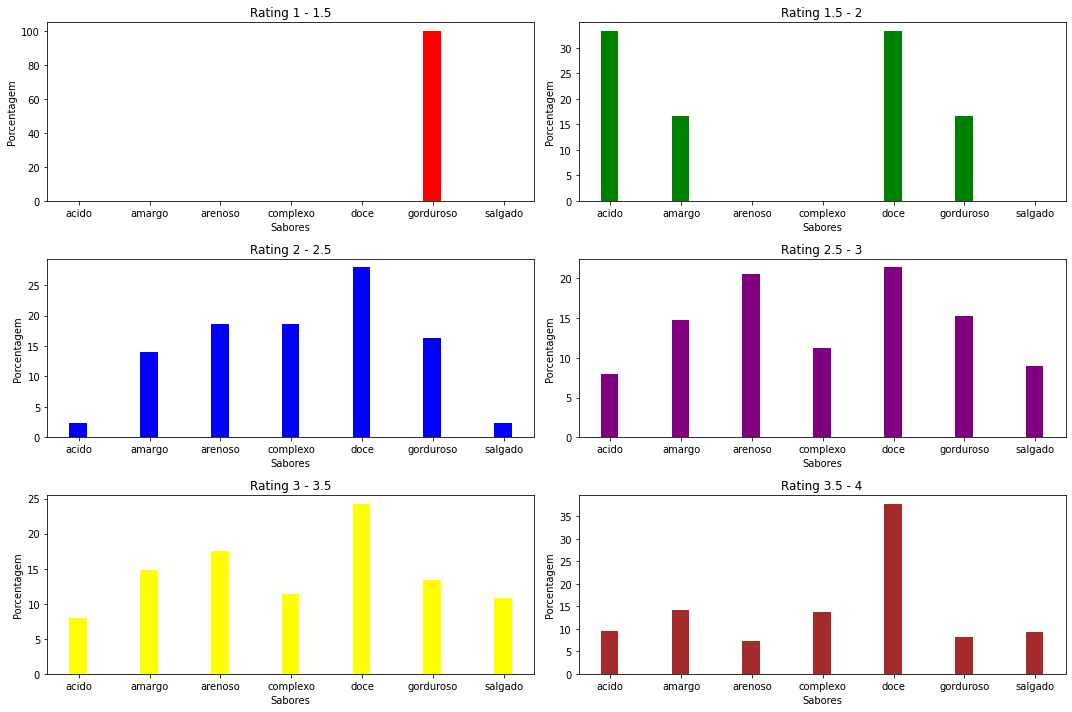

In [146]:
lista = ["1 - 1.5", "1.5 - 2", "2 - 2.5", "2.5 - 3", "3 - 3.5", "3.5 - 4"]
l= [[0.00,0.00,0.00,0.00,0.00,100.00,0.00],[33.33,16.67,0.00,0.00,33.33,16.67,0.00],[2.33,13.95,18.60,18.60,27.91,16.28,2.33],
    [7.93,14.76,20.48,11.23,21.37,15.20,9.03],[7.98,14.80,17.46,11.33,24.28,13.41,10.75],
    [9.59,14.27,7.37,13.68,37.78,8.07,9.24]]

cor = ["red","green","blue","purple","yellow","brown"]

plt.figure(figsize=(15,10))

# Grafico de barras
j=1
for yes in l:
    plt.subplot(3,2,j)
    largura = 0.25
    c = np.arange(len(yes))

    plt.bar(c, yes, color=cor[j-1], width=largura, label="Yes")

    plt.xticks([i+0.01 for i in range(len(yes))],["acido", "amargo", "arenoso", "complexo", "doce", "gorduroso", "salgado"])
    plt.xlabel("Sabores")
    plt.ylabel("Porcentagem")
    plt.title(f"Rating {lista[j-1]}")
    j+=1
plt.tight_layout()    

In [147]:
dados.columns

Index(['local_cia', 'país_grão', '%cacau', 'rating', 'num_ingr',
       'manteiga_cacau', 'baunilha', 'lecitina', '1_sabor', 'inter_rating',
       'manteiga_cacau_', 'baunilha_', 'lecitina_', 'target', 'U.S.A', '70%',
       'latina'],
      dtype='object')

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [149]:
dados

,local_cia,país_grão,%cacau,rating,num_ingr,manteiga_cacau,baunilha,lecitina,1_sabor,inter_rating,manteiga_cacau_,baunilha_,lecitina_,target,U.S.A,70%,latina
0,U.S.A,Madagascar,76.0,3.75,3,s,n,n,amargo,3.5 - 4,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,U.S.A,Dominican republic,76.0,3.50,3,s,n,n,amargo,3.5 - 4,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,U.S.A,Tanzania,76.0,3.25,3,s,n,n,amargo,3 - 3.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,France,Peru,63.0,3.75,4,s,n,s,doce,3.5 - 4,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,France,Bolivia,70.0,3.50,4,s,n,s,salgado,3.5 - 4,1.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Austria,Blend,80.0,2.75,4,s,n,n,gorduroso,2.5 - 3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2220,Austria,Colombia,75.0,3.75,3,s,n,n,salgado,3.5 - 4,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2221,Austria,Belize,72.0,3.50,3,s,n,n,complexo,3.5 - 4,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2222,Austria,Congo,70.0,3.25,3,s,n,n,gorduroso,3 - 3.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [165]:
aaa=pd.get_dummies(data=dados,columns=["1_sabor"])
aaa

,local_cia,país_grão,%cacau,rating,num_ingr,manteiga_cacau,baunilha,lecitina,inter_rating,manteiga_cacau_,...,U.S.A,70%,latina,1_sabor_acido,1_sabor_amargo,1_sabor_arenoso,1_sabor_complexo,1_sabor_doce,1_sabor_gorduroso,1_sabor_salgado
0,U.S.A,Madagascar,76.0,3.75,3,s,n,n,3.5 - 4,1.0,...,1.0,0.0,0.0,0,1,0,0,0,0,0
1,U.S.A,Dominican republic,76.0,3.50,3,s,n,n,3.5 - 4,1.0,...,1.0,0.0,0.0,0,1,0,0,0,0,0
2,U.S.A,Tanzania,76.0,3.25,3,s,n,n,3 - 3.5,1.0,...,1.0,0.0,0.0,0,1,0,0,0,0,0
3,France,Peru,63.0,3.75,4,s,n,s,3.5 - 4,1.0,...,0.0,0.0,1.0,0,0,0,0,1,0,0
4,France,Bolivia,70.0,3.50,4,s,n,s,3.5 - 4,1.0,...,0.0,1.0,1.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Austria,Blend,80.0,2.75,4,s,n,n,2.5 - 3,1.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0
2220,Austria,Colombia,75.0,3.75,3,s,n,n,3.5 - 4,1.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
2221,Austria,Belize,72.0,3.50,3,s,n,n,3.5 - 4,1.0,...,0.0,0.0,1.0,0,0,0,1,0,0,0
2222,Austria,Congo,70.0,3.25,3,s,n,n,3 - 3.5,1.0,...,0.0,1.0,0.0,0,0,0,0,0,1,0


In [166]:
feature = ['num_ingr', 'manteiga_cacau_', 'baunilha_', 'lecitina_', 'target', 'U.S.A', '70%',
       'latina', '1_sabor_acido', '1_sabor_amargo', '1_sabor_arenoso',
       '1_sabor_complexo', '1_sabor_doce', '1_sabor_gorduroso',
       '1_sabor_salgado']
x = aaa[feature]
y = aaa.target

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [168]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [170]:
print("Accuracy:", (metrics.accuracy_score(y_test, y_pred))*100)

Accuracy: 100.0


In [164]:
aaa.columns

Index(['local_cia', 'país_grão', '%cacau', 'rating', 'num_ingr',
       'manteiga_cacau', 'baunilha', 'lecitina', 'inter_rating',
       'manteiga_cacau_', 'baunilha_', 'lecitina_', 'target', 'U.S.A', '70%',
       'latina', '1_sabor_acido', '1_sabor_amargo', '1_sabor_arenoso',
       '1_sabor_complexo', '1_sabor_doce', '1_sabor_gorduroso',
       '1_sabor_salgado'],
      dtype='object')